# import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [4]:
df = pd.read_csv("heart.csv")

# Explore the data

In [6]:
df.shape

(918, 12)

In [7]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [8]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [9]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [10]:
info = {"columns" : df.columns, "dtypes" : df.dtypes, "nunique" : df.nunique(), "Null" : df.isnull().sum()}
pd.DataFrame(info)

columns   dtypes  nunique  Null
Age                        Age    int64       50     0
Sex                        Sex   object        2     0
ChestPainType    ChestPainType   object        4     0
RestingBP            RestingBP    int64       67     0
Cholesterol        Cholesterol    int64      222     0
FastingBS            FastingBS    int64        2     0
RestingECG          RestingECG   object        3     0
MaxHR                    MaxHR    int64      119     0
ExerciseAngina  ExerciseAngina   object        2     0
Oldpeak                Oldpeak  float64       53     0
ST_Slope              ST_Slope   object        3     0
HeartDisease      HeartDisease    int64        2     0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Corolation

<Axes: >

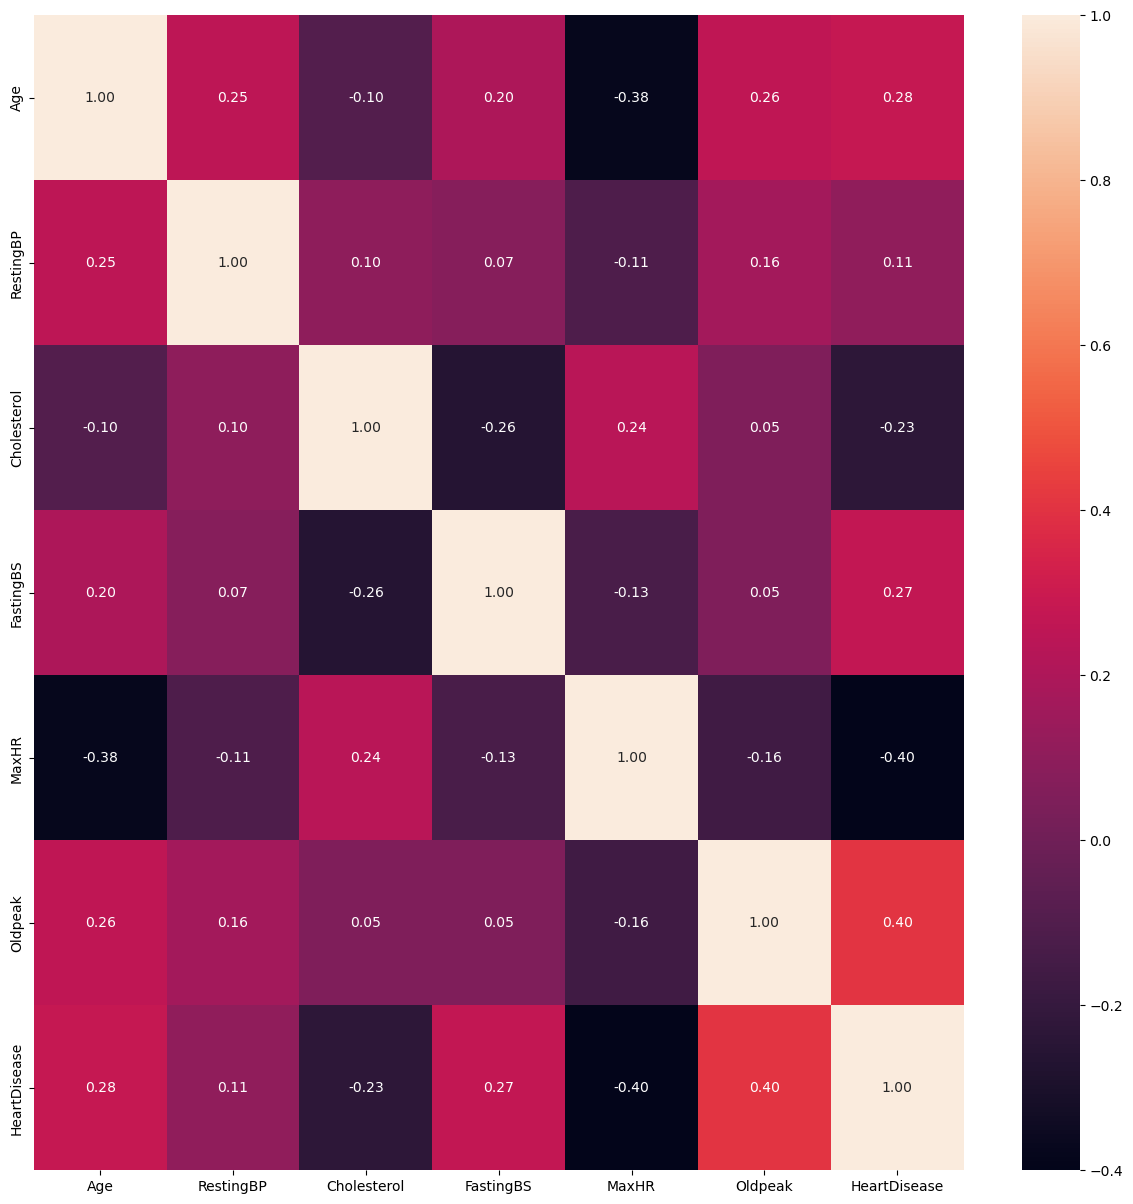

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(data = df.corr(numeric_only=True), annot = True, fmt=".2f")

# Outlires

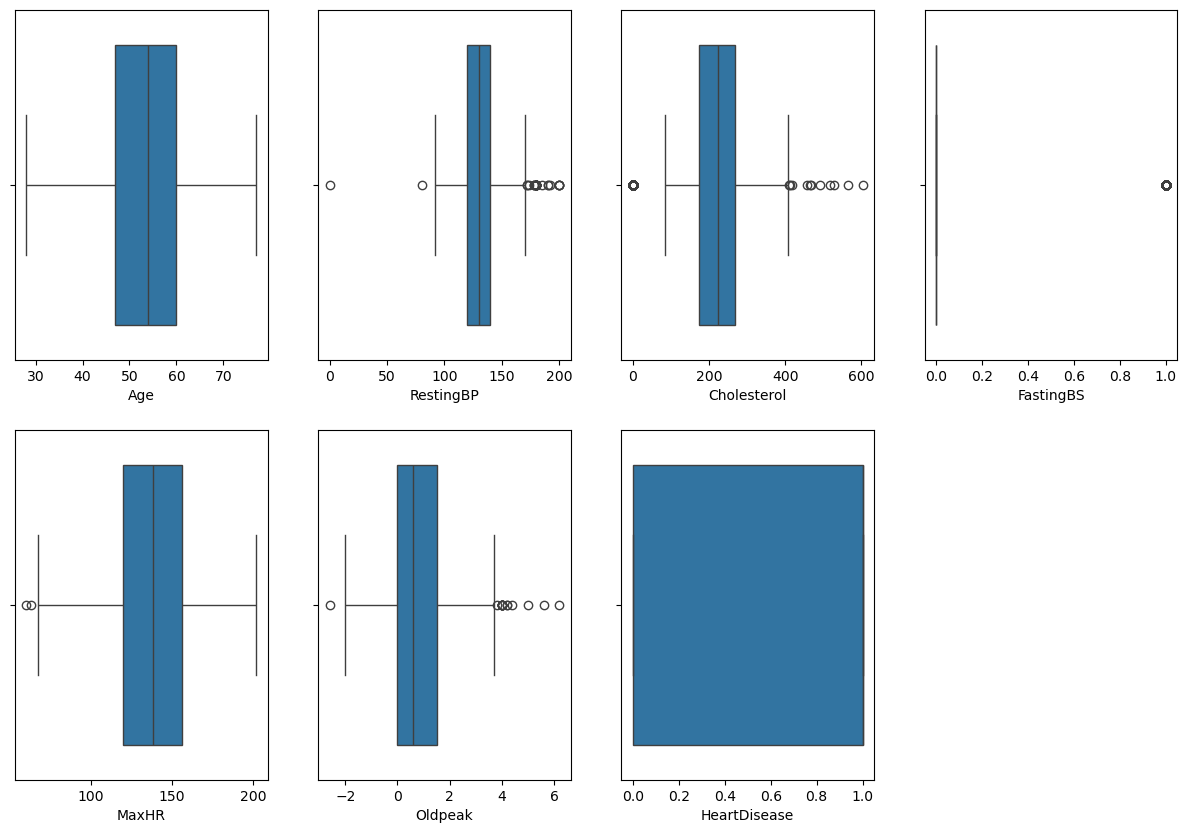

In [15]:
plt.figure(figsize = (15,10))
for i, col in enumerate(df.select_dtypes(include = "number").columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(data = df[col],orient = "h")
    #plt.title(col)
plt.show()

In [26]:
for i in ["Oldpeak", "RestingBP"]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 0.5)
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [28]:
q1 = df["Cholesterol"].quantile(0.25)
q3 = df["Cholesterol"].quantile(0.75)
iqr = q3 - q1
upper = q3 + iqr
lower = q1 - iqr

upper_outlires = df[df["Cholesterol"] > upper]["Cholesterol"].values
#lower_outlires = df[df["Cholesterol"] < upper]["Cholesterol"].values

df["Cholesterol"].replace(upper_outlires, upper, inplace = True)
#df["Cholesterol"].replace(lower_outlires, lower, inplace = True) 

C:\Users\Mx\AppData\Local\Temp\ipykernel_20448\3673105455.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cholesterol"].replace(upper_outlires, upper, inplace = True)


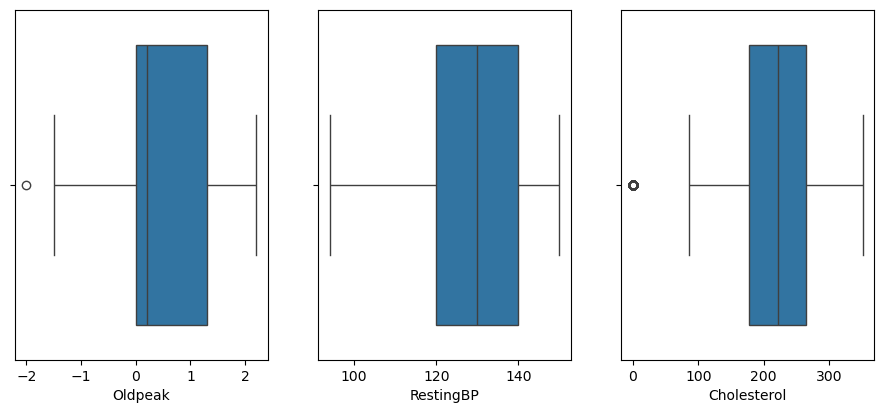

In [30]:
out_cols = ["Oldpeak", "RestingBP", "Cholesterol"]

plt.figure(figsize = (15,10))
for i, col in enumerate(out_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data = df[col],orient = "h")
    #plt.title(col)
plt.show()

In [32]:
df.shape

(725, 12)

In [34]:
#sns.pairplot(data = df)
#plt.show()

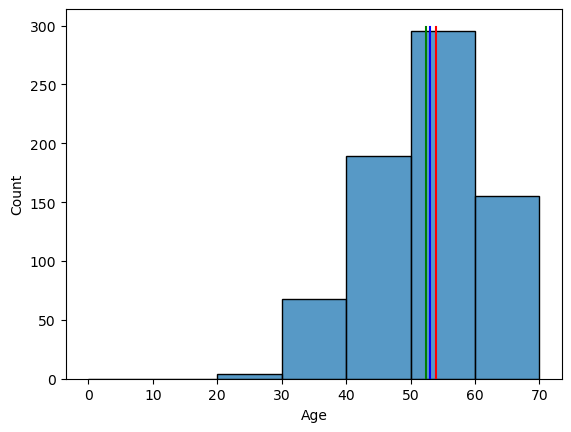

In [36]:
mod = df['Age'].mode()[0]
mn = np.mean(df['Age'])
med = np.median(df['Age'])

sns.histplot(data = df, x = "Age", bins = [i for i in range(0,80,10)])
plt.plot([mn for i in range(0,300)], [i for i in range(0,300)], c = "green", label = "mean")
plt.plot([mod for i in range(0,300)], [i for i in range(0,300)], c = "red", label = "mode")
plt.plot([med for i in range(0,300)], [i for i in range(0,300)], c = "blue", label = "median")

### replace the outlires

In [39]:
"""
for i in out_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + iqr
    lower = q1 - iqr

    upper_outlires = df[df[i] > upper][i].values
    lower_outlires = df[df[i] < upper][i].values

    df[i].replace(upper_outlires, upper, inplace = True)
    df[i].replace(lower_outlires, lower, inplace = True)
    """

'\nfor i in out_cols:\n    q1 = df[i].quantile(0.25)\n    q3 = df[i].quantile(0.75)\n    iqr = q3 - q1\n    upper = q3 + iqr\n    lower = q1 - iqr\n\n    upper_outlires = df[df[i] > upper][i].values\n    lower_outlires = df[df[i] < upper][i].values\n\n    df[i].replace(upper_outlires, upper, inplace = True)\n    df[i].replace(lower_outlires, lower, inplace = True)\n    '

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             725 non-null    int64  
 1   Sex             725 non-null    object 
 2   ChestPainType   725 non-null    object 
 3   RestingBP       725 non-null    int64  
 4   Cholesterol     725 non-null    int64  
 5   FastingBS       725 non-null    int64  
 6   RestingECG      725 non-null    object 
 7   MaxHR           725 non-null    int64  
 8   ExerciseAngina  725 non-null    object 
 9   Oldpeak         725 non-null    float64
 10  ST_Slope        725 non-null    object 
 11  HeartDisease    725 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 73.6+ KB


In [43]:
ordinal_cols = "ExerciseAngina ChestPainType Sex".split()
ordinal_cols

['ExerciseAngina', 'ChestPainType', 'Sex']

In [45]:
#ordinal_columns = df.select_dtypes(include = "object").columns
for i in ordinal_cols:
    ordinal = df.groupby(i)["HeartDisease"].mean().sort_values(ascending=False)
    
    print("-------------------------")
    df[i] = df[i].map(ordinal.rank().astype(int))
    print(df[i].value_counts())

-------------------------
ExerciseAngina
1    460
2    265
Name: count, dtype: int64
-------------------------
ChestPainType
4    374
2    166
1    153
3     32
Name: count, dtype: int64
-------------------------
Sex
2    564
1    161
Name: count, dtype: int64


In [47]:
encoding = "ST_Slope RestingECG".split()
encoding

['ST_Slope', 'RestingECG']

In [49]:
df = pd.get_dummies(data = df, columns = encoding, drop_first = True)
bool_columns = df.select_dtypes(include = "bool").columns
for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

# encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])

In [53]:
object_columns = df.select_dtypes(include = "object").columns
object_columns

Index([], dtype='object')

In [56]:
df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

In [58]:
bool_columns = df.select_dtypes(include = "bool").columns
for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 917
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                725 non-null    int64  
 1   Sex                725 non-null    int64  
 2   ChestPainType      725 non-null    int32  
 3   RestingBP          725 non-null    int64  
 4   Cholesterol        725 non-null    int64  
 5   FastingBS          725 non-null    int64  
 6   MaxHR              725 non-null    int64  
 7   ExerciseAngina     725 non-null    int64  
 8   Oldpeak            725 non-null    float64
 9   HeartDisease       725 non-null    int64  
 10  ST_Slope_Flat      725 non-null    int64  
 11  ST_Slope_Up        725 non-null    int64  
 12  RestingECG_Normal  725 non-null    int64  
 13  RestingECG_ST      725 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 82.1 KB


# split the data

In [63]:
x = df.drop("HeartDisease",axis = 1)
y = df['HeartDisease']

# Standardization

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
x_sc = sc.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.30, random_state=0, stratify=y)

# logistic regression

In [136]:
from sklearn.linear_model import LogisticRegression
# we can add Lasso or Ridge to the model by the penalty method 
# Lasso --> penalty = "l1"
# Ridge --> penalty = "l2"
# and we can control the Lambda by 'C'
# less value of c indecate more rigularzation
lr = LogisticRegression(max_iter=100) #  defult penalty = "l2"

In [138]:
lr.fit(X_train, y_train)

LogisticRegression()

In [140]:
lr.score(X_train, y_train)

0.8796844181459567

In [81]:
lr.score(X_test, y_test)

0.8899082568807339

In [83]:
y_pred = lr.predict(X_test)

# Evaluate the model

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
print(f"confusion_matrix \n{confusion_matrix(y_pred, y_test)}")
print("-------------------------------------------")
print(f"accuracy_score \n{accuracy_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"precision_score \n{precision_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"recall_score \n{recall_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"f1_score \n{f1_score(y_pred, y_test)}")
print("-------------------------------------------")

confusion_matrix 
[[98 12]
 [12 96]]
-------------------------------------------
accuracy_score 
0.8899082568807339
-------------------------------------------
precision_score 
0.8888888888888888
-------------------------------------------
recall_score 
0.8888888888888888
-------------------------------------------
f1_score 
0.8888888888888888
-------------------------------------------


In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

In [90]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_ )
disp.plot()
plt.show()

In [112]:
print("prediction with threshold 0.6")
y_pred = lr.predict_proba(X_test)
print(y_pred)
y_pred_new_threshold =( lr.predict_proba(X_test)[:,1] >= 0.6).astype(int)

prediction with threshold 0.5
[[0.7100145  0.2899855 ]
 [0.73873786 0.26126214]
 [0.35530228 0.64469772]
 [0.89567873 0.10432127]
 [0.16509448 0.83490552]
 [0.77648239 0.22351761]
 [0.96012393 0.03987607]
 [0.98167873 0.01832127]
 [0.94374796 0.05625204]
 [0.94879331 0.05120669]
 [0.91302836 0.08697164]
 [0.08692217 0.91307783]
 [0.38815355 0.61184645]
 [0.06247397 0.93752603]
 [0.94240333 0.05759667]
 [0.93036199 0.06963801]
 [0.79967406 0.20032594]
 [0.23552814 0.76447186]
 [0.90333748 0.09666252]
 [0.05805953 0.94194047]
 [0.26836033 0.73163967]
 [0.76816194 0.23183806]
 [0.95264547 0.04735453]
 [0.84546387 0.15453613]
 [0.97559511 0.02440489]
 [0.26316211 0.73683789]
 [0.97677737 0.02322263]
 [0.94112765 0.05887235]
 [0.97037264 0.02962736]
 [0.94146528 0.05853472]
 [0.4299644  0.5700356 ]
 [0.1298255  0.8701745 ]
 [0.03341718 0.96658282]
 [0.53767906 0.46232094]
 [0.20590518 0.79409482]
 [0.04226888 0.95773112]
 [0.75496329 0.24503671]
 [0.0361868  0.9638132 ]
 [0.78855074 0.21144

In [114]:
cm = confusion_matrix(y_pred_new_threshold, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_ )
disp.plot()
plt.show()

In [132]:
print(f"confusion_matrix \n{confusion_matrix(y_pred_new_threshold, y_test)}")
print("-------------------------------------------")
print(f"accuracy_score \n{accuracy_score(y_pred_new_threshold, y_test)}")
print("-------------------------------------------")
print(f"precision_score \n{precision_score(y_pred_new_threshold, y_test)}")
print("-------------------------------------------")
print(f"recall_score \n{recall_score(y_pred_new_threshold, y_test)}")
print("-------------------------------------------")
print(f"f1_score \n{f1_score(y_pred_new_threshold, y_test)}")
print("-------------------------------------------")

confusion_matrix 
[[101  15]
 [  9  93]]
-------------------------------------------
accuracy_score 
0.8899082568807339
-------------------------------------------
precision_score 
0.8611111111111112
-------------------------------------------
recall_score 
0.9117647058823529
-------------------------------------------
f1_score 
0.8857142857142857
-------------------------------------------


# try to see the accuracy in the train data

In [129]:
print(f"confusion_matrix \n{confusion_matrix(y_train[0:254], y_train[253:])}")
print("-------------------------------------------")
print(f"accuracy_score \n{accuracy_score(y_train[0:254], y_train[253:])}")
print("-------------------------------------------")
print(f"precision_score \n{precision_score(y_train[0:254], y_train[253:])}")
print("-------------------------------------------")
print(f"recall_score \n{recall_score(y_train[0:254], y_train[253:])}")
print("-------------------------------------------")
print(f"f1_score \n{f1_score(y_train[0:254], y_train[253:])}")
print("-------------------------------------------")

confusion_matrix 
[[63 63]
 [68 60]]
-------------------------------------------
accuracy_score 
0.484251968503937
-------------------------------------------
precision_score 
0.4878048780487805
-------------------------------------------
recall_score 
0.46875
-------------------------------------------
f1_score 
0.47808764940239046
-------------------------------------------


In [125]:
y_train.shape

(507,)